In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-reviews-data/rotten_tomatoes_movie_reviews.csv


# ****CodeClause -Project 1****

# > ****Analyze sentiment in movie reviews****

In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# ****Import Necessary Libaries****

In [3]:
import pandas as pd
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ****Load the Dataset****

In [4]:
df=pd.read_csv('/kaggle/input/movie-reviews-data/rotten_tomatoes_movie_reviews.csv')
df

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
...,...,...,...,...,...,...,...,...,...,...,...
1444958,thor_love_and_thunder,102706151,2022-07-05,Christie Cronan,False,7/10,fresh,Raising Whasians,Solid but not totally sold&#44; Thor&#58; Ragn...,POSITIVE,https://raisingwhasians.com/thor-love-and-thun...
1444959,thor_love_and_thunder,102706150,2022-07-05,Ian Sandwell,False,4/5,fresh,Digital Spy,Thor&#58; Love and Thunder is the most enterta...,POSITIVE,https://www.digitalspy.com/movies/a40496050/th...
1444960,thor_love_and_thunder,102706149,2022-07-05,Lauren LaMagna,False,8/10,fresh,Next Best Picture,&quot;Thor&#58; Love and Thunder&quot; is a st...,POSITIVE,https://www.nextbestpicture.com/thor-love-and-...
1444961,thor_love_and_thunder,102706148,2022-07-05,Jake Cole,True,1/4,rotten,Slant Magazine,Across Taika Waititi&#8217;s film&#44; a war a...,NEGATIVE,https://www.slantmagazine.com/film/thor-love-a...


In [5]:
df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

****Checking Null Values****

In [6]:
df.isnull().sum()

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

**Dropping Null Values #'originalScore','reviewText','reviewUrl'**

In [7]:
df=df.dropna(subset=['originalScore','reviewText','reviewUrl'])

In [8]:
df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...


# ****Text Preprocessing****

In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [10]:
# Apply the preprocessing function to the 'reviewText' column
df['cleaned_reviews'] = df['reviewText'].apply(preprocess_text)

# Display the cleaned reviews
print(df[['reviewText', 'cleaned_reviews']].head())

                                          reviewText  \
0  Timed to be just long enough for most youngste...   
1  It doesn't matter if a movie costs 300 million...   
3  The film's out-of-touch attempts at humor may ...   
5  With every new minute, there's another head-sc...   
6  Emotionless reaction shots, zero characterizat...   

                                     cleaned_reviews  
0  timed to be just long enough for most youngste...  
1  it doesnt matter if a movie costs 300 million ...  
3  the films outoftouch attempts at humor may fin...  
5  with every new minute theres another headscrat...  
6  emotionless reaction shots zero characterizati...  


/tmp/ipykernel_30/3042229002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews'] = df['reviewText'].apply(preprocess_text)


# ****Split the Data****

****Divide the data into training and testing sets****

In [11]:
from sklearn.model_selection import train_test_split

X = df['cleaned_reviews']
y = df['scoreSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ****Feature Extraction****

****Convert the text data into numerical form using TF-IDF****

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for simplicity
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# ****Train the Model****

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

# ****Evaluate the Model****

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Model accuracy: 0.77
              precision    recall  f1-score   support

    NEGATIVE       0.81      0.39      0.53     54525
    POSITIVE       0.76      0.95      0.85    110315

    accuracy                           0.77    164840
   macro avg       0.78      0.67      0.69    164840
weighted avg       0.78      0.77      0.74    164840



# ****Visualize the Model's Performance****

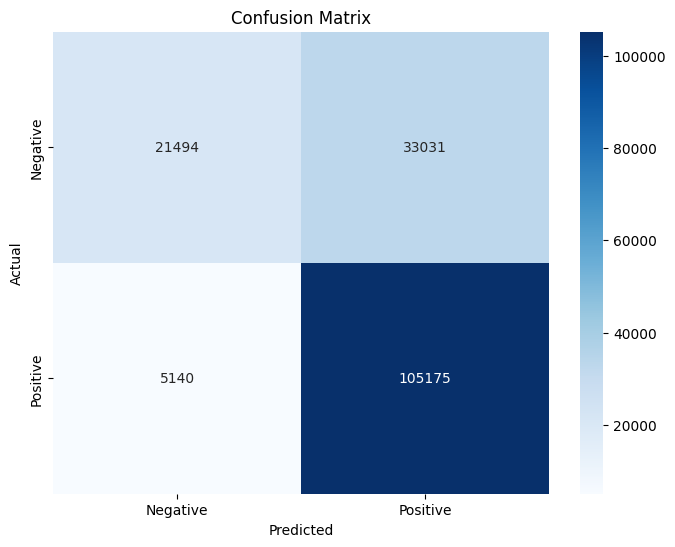

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ****Feature Importance****

In [16]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get the probabilities of the features
weights = model.feature_log_prob_[1] - model.feature_log_prob_[0]
feature_importance = np.argsort(weights)[::-1][:10]

# Display the top 10 important features
print("Top 10 features contributing to positive sentiment:")
for index in feature_importance:
    print(feature_names[index])

Top 10 features contributing to positive sentiment:
gem
masterfully
superbly
deftly
joyous
deceptively
examines
smartly
wonderfully
spellbinding
